In [1]:
print("\U0001f600") 

😀


In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
train_data=pd.read_excel("F:\data sets\Analytics vidya\hackerrank\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")

In [4]:
train_data['Date']=train_data['Date_of_Journey'].str.split('/').str[0]
train_data['Month']=train_data['Date_of_Journey'].str.split('/').str[1]
train_data['Year']=train_data['Date_of_Journey'].str.split('/').str[2]


In [5]:
train_data['Date']=train_data['Date'].astype(int)
train_data['Month']=train_data["Month"].astype(int)
train_data['Year']=train_data['Year'].astype(int)

In [6]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [7]:
train_data['Arrival_Time']=train_data['Arrival_Time'].str.split(' ').str[0]

In [8]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [9]:
np.sum(train_data.isnull())

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [10]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [11]:
train_data['Total_Stops']=train_data['Total_Stops'].fillna('1 stop')

In [12]:
train_data['Total_Stops']=train_data['Total_Stops'].replace('non-stop','0 stop')

In [13]:
train_data['Total_Stops']=train_data['Total_Stops'].str.split(' ').str[0]
train_data['Total_Stops']=train_data['Total_Stops'].astype(int)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [15]:
train_data['Arrival_hour']=train_data['Arrival_Time'].str.split(':').str[0]
train_data['Arrival_minute']=train_data['Arrival_Time'].str.split(':').str[1]

In [16]:
train_data['Arrival_hour']=train_data["Arrival_hour"].astype(int)
train_data['Arrival_minute']=train_data['Arrival_minute'].astype(int)

In [17]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [18]:
train_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [19]:
train_data['Dep_hour']=train_data["Dep_Time"].str.split(':').str[0]
train_data['Dep_minute']=train_data['Dep_Time'].str.split(':').str[1]

In [20]:
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [21]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [22]:
train_data['Route1']=train_data['Route'].str.split('→').str[0]
train_data['Route2']=train_data['Route'].str.split('→').str[1]
train_data['Route3']=train_data['Route'].str.split('→').str[2]
train_data['Route4']=train_data['Route'].str.split('→').str[3]
train_data['Route5']=train_data['Route'].str.split('→').str[4]


In [23]:
train_data.drop(['Route'],axis=1,inplace=True)

In [24]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [25]:
train_data['Route1'].fillna("None",inplace=True)
train_data['Route2'].fillna("None",inplace=True)
train_data['Route3'].fillna("None",inplace=True)
train_data['Route4'].fillna("None",inplace=True)
train_data['Route5'].fillna("None",inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()
train_data['Airline']=lable.fit_transform(train_data['Airline'])
train_data['Source']=lable.fit_transform(train_data['Source'])
train_data['Destination']=lable.fit_transform(train_data['Destination'])
train_data["Additional_Info"]=lable.fit_transform(train_data['Additional_Info'])
train_data["Route1"]=lable.fit_transform(train_data['Route1'])
train_data['Route2']=lable.fit_transform(train_data['Route2'])
train_data['Route3']=lable.fit_transform(train_data['Route3'])
train_data['Route4']=lable.fit_transform(train_data['Route4'])
train_data['Route5']=lable.fit_transform(train_data['Route5'])

In [27]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route1,Route2,Route3,Route4,Route5
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,0,13,29,13,5
1,1,3,0,2,8,7662,1,5,2019,13,15,05,50,2,25,1,3,5
2,4,2,1,2,8,13882,9,6,2019,4,25,09,25,3,32,4,5,5
3,3,3,0,1,8,6218,12,5,2019,23,30,18,05,2,34,3,13,5
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,0,34,8,13,5


In [28]:
train_data['Dep_hour']=train_data['Dep_hour'].astype(int)
train_data['Dep_minute']=train_data['Dep_minute'].astype(int)

In [29]:
train_data=train_data[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_minute',
       'Dep_hour', 'Dep_minute', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5','Price']]

In [30]:
features=train_data.drop(['Price'],axis=1)

In [31]:
label=train_data[['Price']]

# Test data

In [36]:
test_data=pd.read_excel("F:\data sets\Analytics vidya\hackerrank\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [37]:
%%time
test_data['Date']=test_data['Date_of_Journey'].str.split('/').str[0]
test_data['Month']=test_data['Date_of_Journey'].str.split('/').str[1]
test_data['Year']=test_data['Date_of_Journey'].str.split('/').str[2]
test_data['Date']=test_data['Date'].astype(int)
test_data['Month']=test_data["Month"].astype(int)
test_data['Year']=test_data['Year'].astype(int)
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)
test_data['Arrival_Time']=test_data['Arrival_Time'].str.split(' ').str[0]
test_data['Total_Stops']=test_data['Total_Stops'].fillna('1 stop')
test_data['Total_Stops']=test_data['Total_Stops'].replace('non-stop','0 stop')
test_data['Total_Stops']=test_data['Total_Stops'].str.split(' ').str[0]
test_data['Total_Stops']=test_data['Total_Stops'].astype(int)
test_data['Arrival_hour']=test_data['Arrival_Time'].str.split(':').str[0]
test_data['Arrival_minute']=test_data['Arrival_Time'].str.split(':').str[1]
test_data['Arrival_hour']=test_data["Arrival_hour"].astype(int)
test_data['Arrival_minute']=test_data['Arrival_minute'].astype(int)
test_data.drop(['Arrival_Time'],axis=1,inplace=True)
test_data['Dep_hour']=test_data["Dep_Time"].str.split(':').str[0]
test_data['Dep_minute']=test_data['Dep_Time'].str.split(':').str[1]
test_data.drop(["Dep_Time"],axis=1,inplace=True)
test_data['Route1']=test_data['Route'].str.split('→').str[0]
test_data['Route2']=test_data['Route'].str.split('→').str[1]
test_data['Route3']=test_data['Route'].str.split('→').str[2]
test_data['Route4']=test_data['Route'].str.split('→').str[3]
test_data['Route5']=test_data['Route'].str.split('→').str[4]
test_data.drop(['Route'],axis=1,inplace=True)
test_data.drop(['Duration'],axis=1,inplace=True)
test_data['Route1'].fillna("None",inplace=True)
test_data['Route2'].fillna("None",inplace=True)
test_data['Route3'].fillna("None",inplace=True)
test_data['Route4'].fillna("None",inplace=True)
test_data['Route5'].fillna("None",inplace=True)
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()
test_data['Airline']=lable.fit_transform(test_data['Airline'])
test_data['Source']=lable.fit_transform(test_data['Source'])
test_data['Destination']=lable.fit_transform(test_data['Destination'])
test_data["Additional_Info"]=lable.fit_transform(test_data['Additional_Info'])
test_data["Route1"]=lable.fit_transform(test_data['Route1'])
test_data['Route2']=lable.fit_transform(test_data['Route2'])
test_data['Route3']=lable.fit_transform(test_data['Route3'])
test_data['Route4']=lable.fit_transform(test_data['Route4'])
test_data['Route5']=lable.fit_transform(test_data['Route5'])
test_data['Dep_hour']=test_data['Dep_hour'].astype(int)
test_data['Dep_minute']=test_data['Dep_minute'].astype(int)

Wall time: 201 ms


In [38]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route1,Route2,Route3,Route4,Route5
0,4,2,1,1,5,6,6,2019,4,25,17,30,3,7,5,9,4
1,3,3,0,1,5,12,5,2019,10,20,6,20,2,29,3,9,4
2,4,2,1,1,3,21,5,2019,19,0,19,15,3,7,5,9,4
3,6,2,1,1,5,21,5,2019,21,0,8,0,3,7,5,9,4
4,0,0,2,0,5,24,6,2019,2,45,23,55,0,13,27,9,4


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=21)

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
forest.score(X_train,y_train)

0.9816688666717689

In [64]:
forest.score(X_test,y_test)

0.9089782848813305

In [65]:
y_pred=forest.predict(X_test)

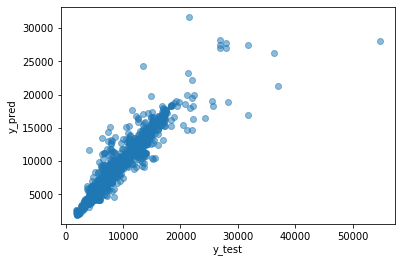

In [66]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [67]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 579.8819250729773
MSE: 1854592.3568634503
RMSE: 1361.834188461815


In [68]:
metrics.r2_score(y_test,y_pred)

0.9089782848813306

# Hypertuning


In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [71]:
from sklearn.model_selection import RandomizedSearchCV
forest_tune=RandomizedSearchCV(estimator=forest,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,
                              cv=5,random_state=42,verbose=2,n_jobs=1)

In [72]:
 forest_tune.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:
forest_tune.score(X_train,y_train)

-373283.2537049078

In [74]:
forest_tune.score(X_test,y_test)

-2397027.9422588465

In [75]:
features.shape

(10683, 17)

In [76]:
test_data.shape

(2671, 17)

In [77]:
x=test_data

In [78]:
test_data['Price']=forest.predict(x)

In [79]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route1,Route2,Route3,Route4,Route5,Price
0,4,2,1,1,5,6,6,2019,4,25,17,30,3,7,5,9,4,10932.22
1,3,3,0,1,5,12,5,2019,10,20,6,20,2,29,3,9,4,8019.40
2,4,2,1,1,3,21,5,2019,19,0,19,15,3,7,5,9,4,33718.31
3,6,2,1,1,5,21,5,2019,21,0,8,0,3,7,5,9,4,10030.65
4,0,0,2,0,5,24,6,2019,2,45,23,55,0,13,27,9,4,8288.95


In [80]:
data_frame=test_data[['Price']]

In [82]:
data_frame.to_csv('price.csv',index=0)